<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

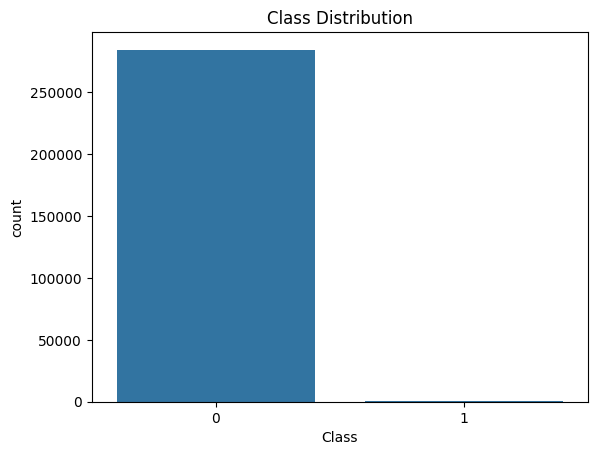

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import time

# Загрузка данных
df = pd.read_csv("creditcard.csv")

# Предварительный анализ
df.info()
print(df.describe())
print(df.isnull().sum())

# Балансировка классов
print("Class distribution:")
print(df['Class'].value_counts())

# Визуализация распределения классов
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


In [ ]:
print(f"Дубликаты: {df.duplicated().sum()}")
df = df.drop_duplicates()


График распределения мошеннических операций по времени

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем график
plt.figure(figsize=(12, 6))
ax = sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='red')

# Добавляем подписи
plt.title('Распределение мошеннических операций по времени', fontsize=14, pad=20)
plt.xlabel('Время от первой транзакции (секунды)', fontsize=12)
plt.ylabel('Количество мошеннических операций', fontsize=12)

# Добавляем сетку для лучшей читаемости
plt.grid(True, linestyle='--', alpha=0.3)

# Показываем график
plt.tight_layout()
plt.show()

График распределения нормальных операций по времени

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем график
plt.figure(figsize=(12, 6))
ax = sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, color='blue')

# Добавляем подписи
plt.title('Распределение нормальных операций по времени', fontsize=14, pad=20)
plt.xlabel('Время от первой транзакции (секунды)', fontsize=12)
plt.ylabel('Количество нормальных операций', fontsize=12)

# Добавляем сетку для лучшей читаемости
plt.grid(True, linestyle='--', alpha=0.3)

# Показываем график
plt.tight_layout()
plt.show()

Нормализация

In [113]:
# Масштабирование признака 'Amount'
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['normTime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount', 'Time'], axis=1, inplace=True)
# df.drop(['Amount'], axis=1, inplace=True)

# Разделение на признаки и целевую переменную
X = df.drop('Class', axis=1)
y = df['Class']

#print(df[['normAmount']].describe())

Визуализация Amount до и после масштабирования

In [ ]:
import seaborn as sns
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50)

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Распределение суммы транзакций (Amount)')
plt.xlabel('Сумма')
plt.ylabel('Количество')
plt.grid(True)
plt.show()


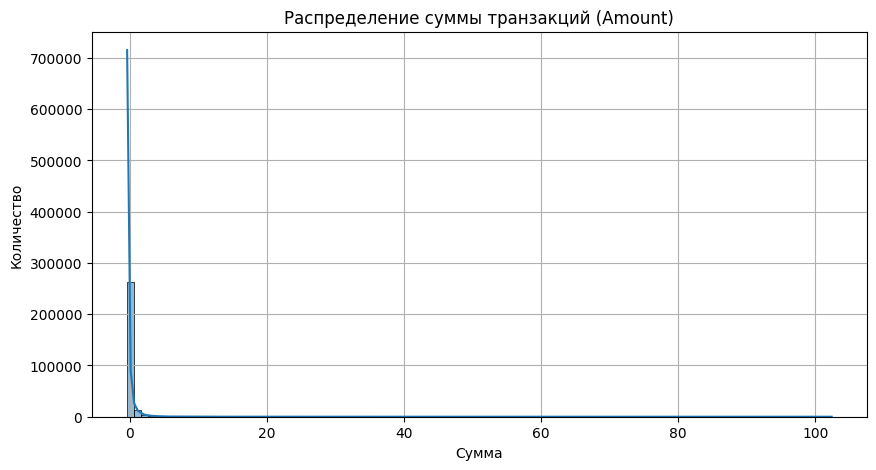

In [114]:
plt.figure(figsize=(10, 5))
sns.histplot(df['normAmount'], bins=100, kde=True)
plt.title('Распределение суммы транзакций (Amount)')
plt.xlabel('Сумма')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

Матрица корреляций между признаками

In [ ]:
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5,vmax=0.5)
plt.title('Матрица корреляций между признаками')
plt.show()


Разделение на обучающую и тестовую выборки

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем DataFrame с важностью признаков
feature_importance = pd.DataFrame({
    'Признак': X_train.columns,  # Названия столбцов из ваших данных
    'Важность': model.feature_importances_
})

# Сортируем по убыванию важности
feature_importance = feature_importance.sort_values('Важность', ascending=False)

# Настройки отображения для Pandas (чтобы видеть все строки)
pd.set_option('display.max_rows', None)  # Показать все строки
pd.set_option('display.float_format', '{:.6f}'.format)  # Формат чисел

# Выводим полную таблицу
print("╒═══════════╤════════════╕")
print("│ Признак   │ Важность   │")
print("╞═══════════╪════════════╡")
for _, row in feature_importance.iterrows():
    print(f"│ {row['Признак']:9} │ {row['Важность']:.6f} │")
print("╘═══════════╧════════════╛")

# Визуализация для всех признаков
plt.figure(figsize=(8, 12))
plt.barh(feature_importance['Признак'], feature_importance['Важность'])
plt.xlabel('Уровень важности')
plt.title('Важность всех признаков в RandomForest')
plt.gca().invert_yaxis()  # Самый важный признак - сверху
plt.tight_layout()
plt.show()

Метод для обучения и сбора метрик модели

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import time

results = {}

def evaluate_model(model, X_train = X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_name="Model"):
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {model_name}")
    print("Время обучения:", round(train_time, 2), "секунд")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    print("ROC AUC Score:", auc) #round(roc_auc_score(y_test, y_proba), 4))

    # ROC кривая
    # fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    # plt.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc_score(y_test, y_proba):.2f})')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d') 

    results[model_name] = {
        'model': model,
        'auc': auc,
        'train_time': train_time
    }

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

results = {}

def evaluate_model(model, 
                   X_train=X_train, X_test=X_test, 
                   y_train=y_train, y_test=y_test, 
                   model_name="Model"):
    print("="*60)
    print(f"🔍 Оценка модели: {model_name}")
    
    # Фиксация времени обучения
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    # Предсказания
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = round(roc_auc_score(y_test, y_proba), 4)
    except:
        y_proba = None
        auc = 'N/A'

    # Отчёт по метрикам
    print(f"Время обучения: {train_time:.2f} секунд")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    print("ROC AUC Score:", auc)

    # Отображение параметров, если применимо
    if hasattr(model, 'get_params'):
        print("🔧 Параметры модели:")
        for k, v in model.get_params().items():
            print(f"   {k}: {v}")
    else:
        print("ℹПараметры модели не отображаются (отсутствует метод get_params())")

    # Визуализация матрицы ошибок
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок: {model_name}')
    plt.xlabel('Предсказано')
    plt.ylabel('Факт')
    plt.show()

    # Сохранение результатов
    results[model_name] = {
        'model': model,
        'auc': auc,
        'train_time': train_time,
        'params': model.get_params() if hasattr(model, 'get_params') else None
    }


In [ ]:
evaluate_model(LogisticRegression(max_iter=1000),model_name = 'Logistic Regression')

In [ ]:
evaluate_model(RandomForestClassifier(),model_name = 'Random Forest')

In [ ]:
evaluate_model( KNeighborsClassifier(),model_name = 'KNN')

In [ ]:
evaluate_model(SVC(probability=True),model_name = 'SVM')

In [ ]:
evaluate_model( GaussianNB(),model_name = 'Naive Bayes')

In [ ]:
evaluate_model(  GradientBoostingClassifier(),model_name = 'Gradient Boosting')

🔍 Оценка модели: XGBoost
Время обучения: 0.62 секунд
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85288     7]
 [   36   112]]
ROC AUC Score: 0.9286
🔧 Параметры модели:
   objective: binary:logistic
   base_score: None
   booster: None
   callbacks: None
   colsample_bylevel: None
   colsample_bynode: None
   colsample_bytree: None
   device: None
   early_stopping_rounds: None
   enable_categorical: False
   eval_metric: logloss
   feature_types: None
   feature_weights: None
   gamma: None
   grow_policy: None
   importance_type: None
   interaction_constraints: None
   learning_rate: None
   max_bin: None
   max_cat_threshold: None
   max_cat_to_onehot: None
   

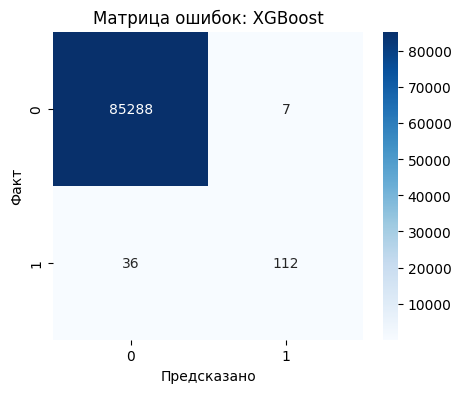

In [110]:
evaluate_model( XGBClassifier(eval_metric='logloss'),model_name = 'XGBoost')

In [ ]:
evaluate_model( LGBMClassifier(),model_name = 'LightGBM')

In [ ]:
# Визуализация ROC-кривых
print(results)
plt.figure(figsize=(10,8))
for name, res in results.items():
    model = res['model']
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={res['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

Изменение и поиск оптимальных гиперпараметров для XGBClassifier

In [102]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import time

In [103]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [1, 5, 10, 20]
}

In [104]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=300,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

start = time.time()
search.fit(X_train, y_train)
end = time.time()

print(f"\nВремя подбора гиперпараметров: {end - start:.2f} сек")


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


c:\Users\xellis\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:44:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Время подбора гиперпараметров: 498.64 сек


Лучшие параметры: {'subsample': 0.6, 'scale_pos_weight': 5, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.78      0.86       148

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
 [[85289     6]
 [   32   116]]

ROC AUC Score: 0.9780


<Axes: >

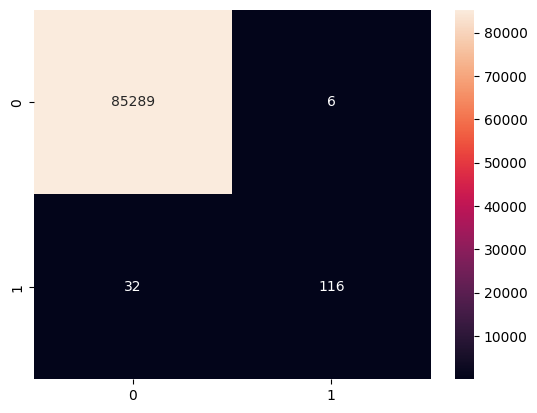

In [105]:
best_model = search.best_estimator_

# Предсказание
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Метрики
print("Лучшие параметры:", search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d') 
# ROC кривая
#fpr, tpr, thresholds = roc_curve(y_test, y_proba)
#plt.plot(fpr, tpr, label=f'{'XGBClassifier'} (AUC={roc_auc_score(y_test, y_proba):.2f})')